# Business Understanding

Peningkatan urbanisasi dan aktivitas industri di wilayah metropolitan serta pembakaran liar diberbagai daerah telah menyebabkan perhatian yang meningkat terhadap kualitas udara. Kondisi ini memunculkan kekhawatiran tentang dampak kesehatan masyarakat, mengingat bahwa paparan terus-menerus terhadap polutan udara dapat menyebabkan berbagai masalah kesehatan, termasuk penyakit pernapasan dan kardiovaskular.

Dalam beberapa tahun terakhir, laporan kualitas udara menunjukkan peningkatan kadar polutan di beberapa wilayah metropolitan. Pemerintah daerah dan masyarakat perlu memiliki pemahaman yang lebih baik tentang tren kualitas udara, serta sistem yang dapat memberikan peringatan dini jika ada potensi risiko kesehatan.

Selain itu, perusahaan industri juga dihadapkan pada tanggung jawab untuk mengelola dampak lingkungan dari operasional mereka. Memahami dan mengukur dampak polusi udara dari kegiatan industri menjadi krusial untuk mengambil langkah-langkah proaktif dalam melindungi lingkungan dan kesehatan masyarakat.

Oleh karena itu, perlu dikembangkan suatu sistem yang dapat memprediksi kualitas udara dengan akurat, memberikan pemantauan secara real-time, dan memberikan informasi yang dapat diakses oleh pemerintah, industri, dan masyarakat umum. Dengan demikian, proyek ini bertujuan untuk mengatasi kekurangan tersebut dan memberikan solusi yang efektif dalam mengelola kualitas udara di wilayah metropolitan khususnya negara India.

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
#  Loading Data

path = "/content/air_pollution_data.csv"
load_data = pd.read_csv(path)

In [4]:
# Membuat data frame

df = pd.DataFrame(load_data)
df.head()

city        date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad  30-11-2020    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad  01-12-2020    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad  02-12-2020    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad  03-12-2020    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad  04-12-2020    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm10    nh3  
0   72.13   8.36  
1  154.53  27.36  
2  172.63  28.12  
3  202.15  36.48  
4  205.80  40.53

In [5]:
# Mendrop kolom no dan nh3, karena dalam index AQI india data no tidak digunakan & nh3 tidak tersedia pada data uji coba pada tahap selanjutnya

df_new = df.drop(['no','nh3'], axis= 1)
df = df_new

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no2     23504 non-null  float64
 5   o3      23504 non-null  float64
 6   so2     23504 non-null  float64
 7   pm2_5   23504 non-null  float64
 8   pm10    23504 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.6+ MB


In [7]:
# data dibagi 10 agar menyesuaikan dengan satuan index AQI India yang menggunakan miligram bukan mikrogram

dfx = df[['aqi','co',		'no2',	'o3',	'so2',	'pm2_5',	'pm10']]/10
dfx.head()

aqi       co    no2      o3    so2   pm2_5    pm10
0  0.5   52.071  1.628  13.018  4.768   6.596   7.213
1  0.5  168.228  5.484   0.073  2.170  12.095  15.453
2  0.5  181.580  4.935   0.017  2.384  13.347  17.263
3  0.5  229.645  4.010   0.000  3.576  15.037  20.215
4  0.5  218.964  5.895   0.002  2.813  16.079  20.580

In [8]:
# cek isi data
dfx.describe()

aqi            co           no2            o3           so2  \
count  23504.000000  23504.000000  23504.000000  23504.000000  23504.000000   
mean       0.392035    111.322454      2.504410      3.505978      1.597145   
std        0.141549    140.177037      2.583924      3.190176      2.394346   
min        0.100000     17.357000      0.031000      0.000000      0.019000   
25%        0.300000     44.727000      0.874000      0.787000      0.447000   
50%        0.500000     70.095000      1.645000      2.825000      0.799000   
75%        0.500000    118.828000      3.222000      5.436000      1.645000   
max        0.500000   2307.129000     33.176000     40.627000     44.251000   

              pm2_5          pm10  
count  23504.000000  23504.000000  
mean       9.859831     12.184809  
std       13.557239     16.042959  
min        0.050000      0.058000  
25%        2.467750      3.227750  
50%        5.886000      7.577500  
75%       11.760500     14.764250  
max      220.355000    242.913000

In [9]:
# cek null
dfx.isnull().sum()

aqi      0
co       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
dtype: int64

In [10]:
# Mengecek jumlah kandungan o3 yang bernilai 0

o3 = (dfx.o3 == 0).sum()
print("Nilai 0 di kolom o3 ada: ", o3)

Nilai 0 di kolom o3 ada:  1551


In [11]:
# Drop baris dengan nilai 'o3' = 0
dfx = dfx.loc[(dfx[['o3']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
dfx.shape

(21953, 7)

In [12]:
# cek isi data
dfx.describe()

aqi            co           no2            o3           so2  \
count  21953.000000  21953.000000  21953.000000  21953.000000  21953.000000   
mean       0.384804     88.534795      2.209319      3.753678      1.305276   
std        0.143511     72.501802      2.124741      3.156969      1.718816   
min        0.100000     17.357000      0.031000      0.001000      0.019000   
25%        0.300000     43.392000      0.831000      1.252000      0.423000   
50%        0.400000     66.090000      1.525000      3.111000      0.751000   
75%        0.500000    105.476000      2.845000      5.651000      1.442000   
max        0.500000    918.579000     26.047000     40.627000     22.697000   

              pm2_5          pm10  
count  21953.000000  21953.000000  
mean       8.097664     10.052702  
std        8.835860     10.451853  
min        0.050000      0.058000  
25%        2.263000      2.967000  
50%        5.417000      6.973000  
75%       10.457000     13.149000  
max      103.485000    110.383000

In [13]:
# mengecek sebaran aqi berdasarkan kategorinya

df['aqi'].value_counts()

5    12458
4     4324
1     2618
2     2372
3     1732
Name: aqi, dtype: int64

In [14]:
# mengecek sebaran city

df['city'].value_counts()

Ahmedabad             904
Aizawl                904
Thiruvananthapuram    904
Talcher               904
Shillong              904
Patna                 904
Mumbai                904
Lucknow               904
Kolkata               904
Kochi                 904
Jorapokhar            904
Jaipur                904
Hyderabad             904
Guwahati              904
Gurugram              904
Ernakulam             904
Delhi                 904
Coimbatore            904
Chennai               904
Chandigarh            904
Brajrajnagar          904
Bhopal                904
Bengaluru             904
Amritsar              904
Amaravati             904
Visakhapatnam         904
Name: city, dtype: int64

<Axes: >

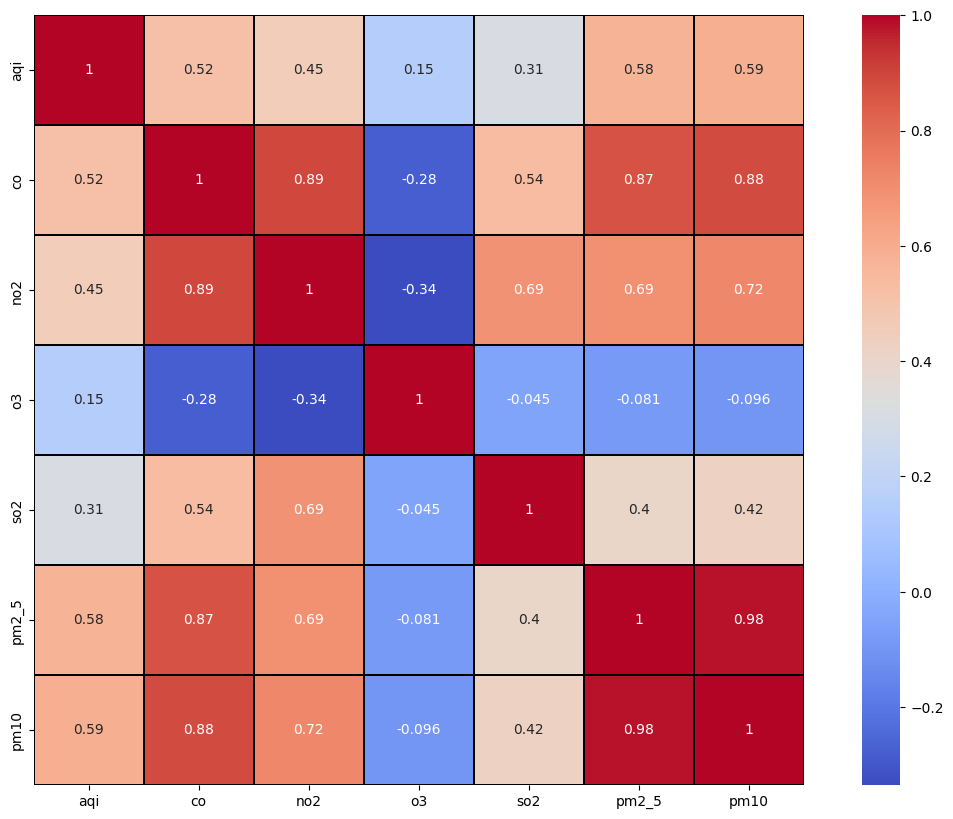

In [15]:
# cek korelasi
f,ax= plt.subplots(figsize=(15,10))
sns.heatmap(dfx.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

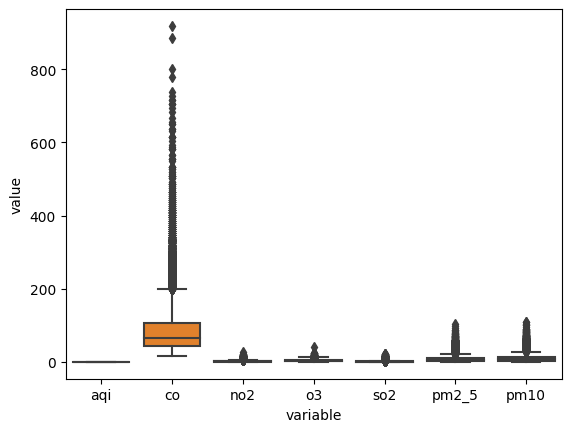

In [16]:
# cek outlier

sns.boxplot(x='variable', y='value', data=pd.melt(dfx))
plt.show()

In [17]:
# IQR

Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR=Q3-Q1
dfx=dfx[~((dfx<(Q1-1.5*IQR))|(dfx>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
dfx.shape

(18131, 7)

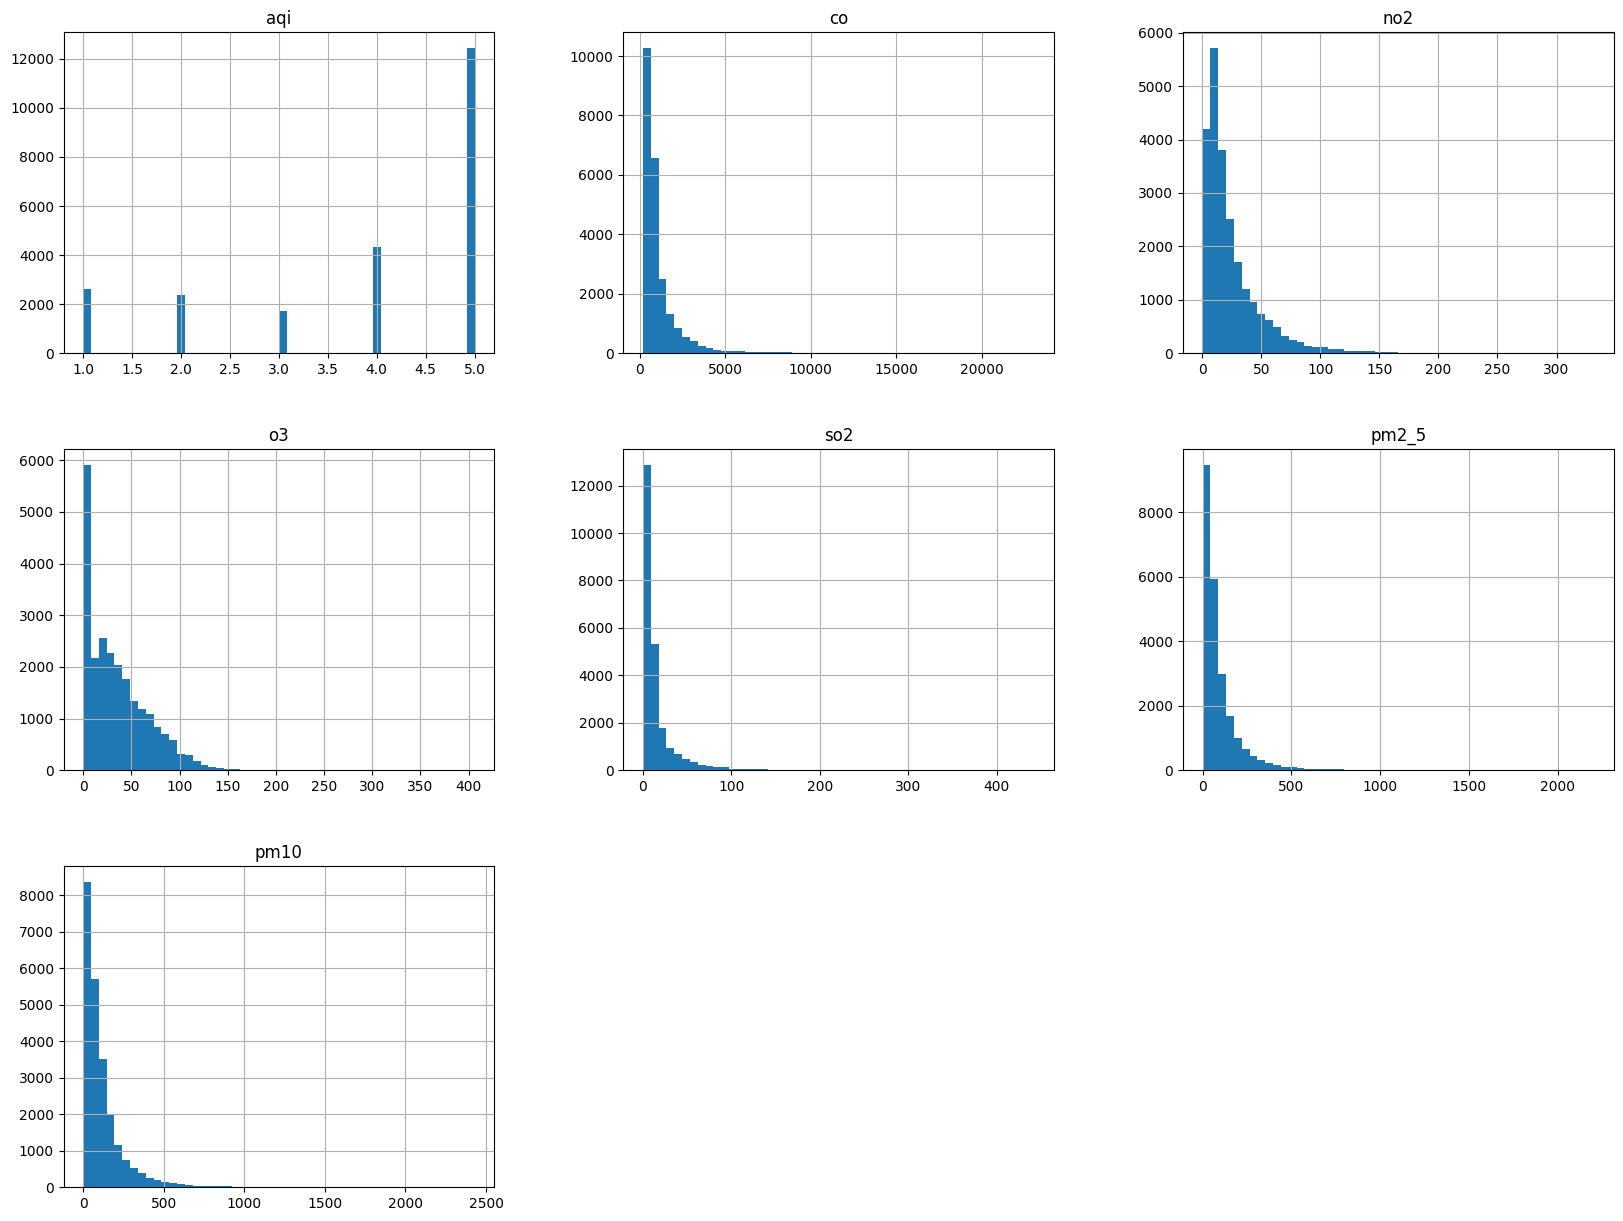

In [18]:
# melihat nilai distribusi

df.hist(bins=50, figsize=(20,15))
plt.show()

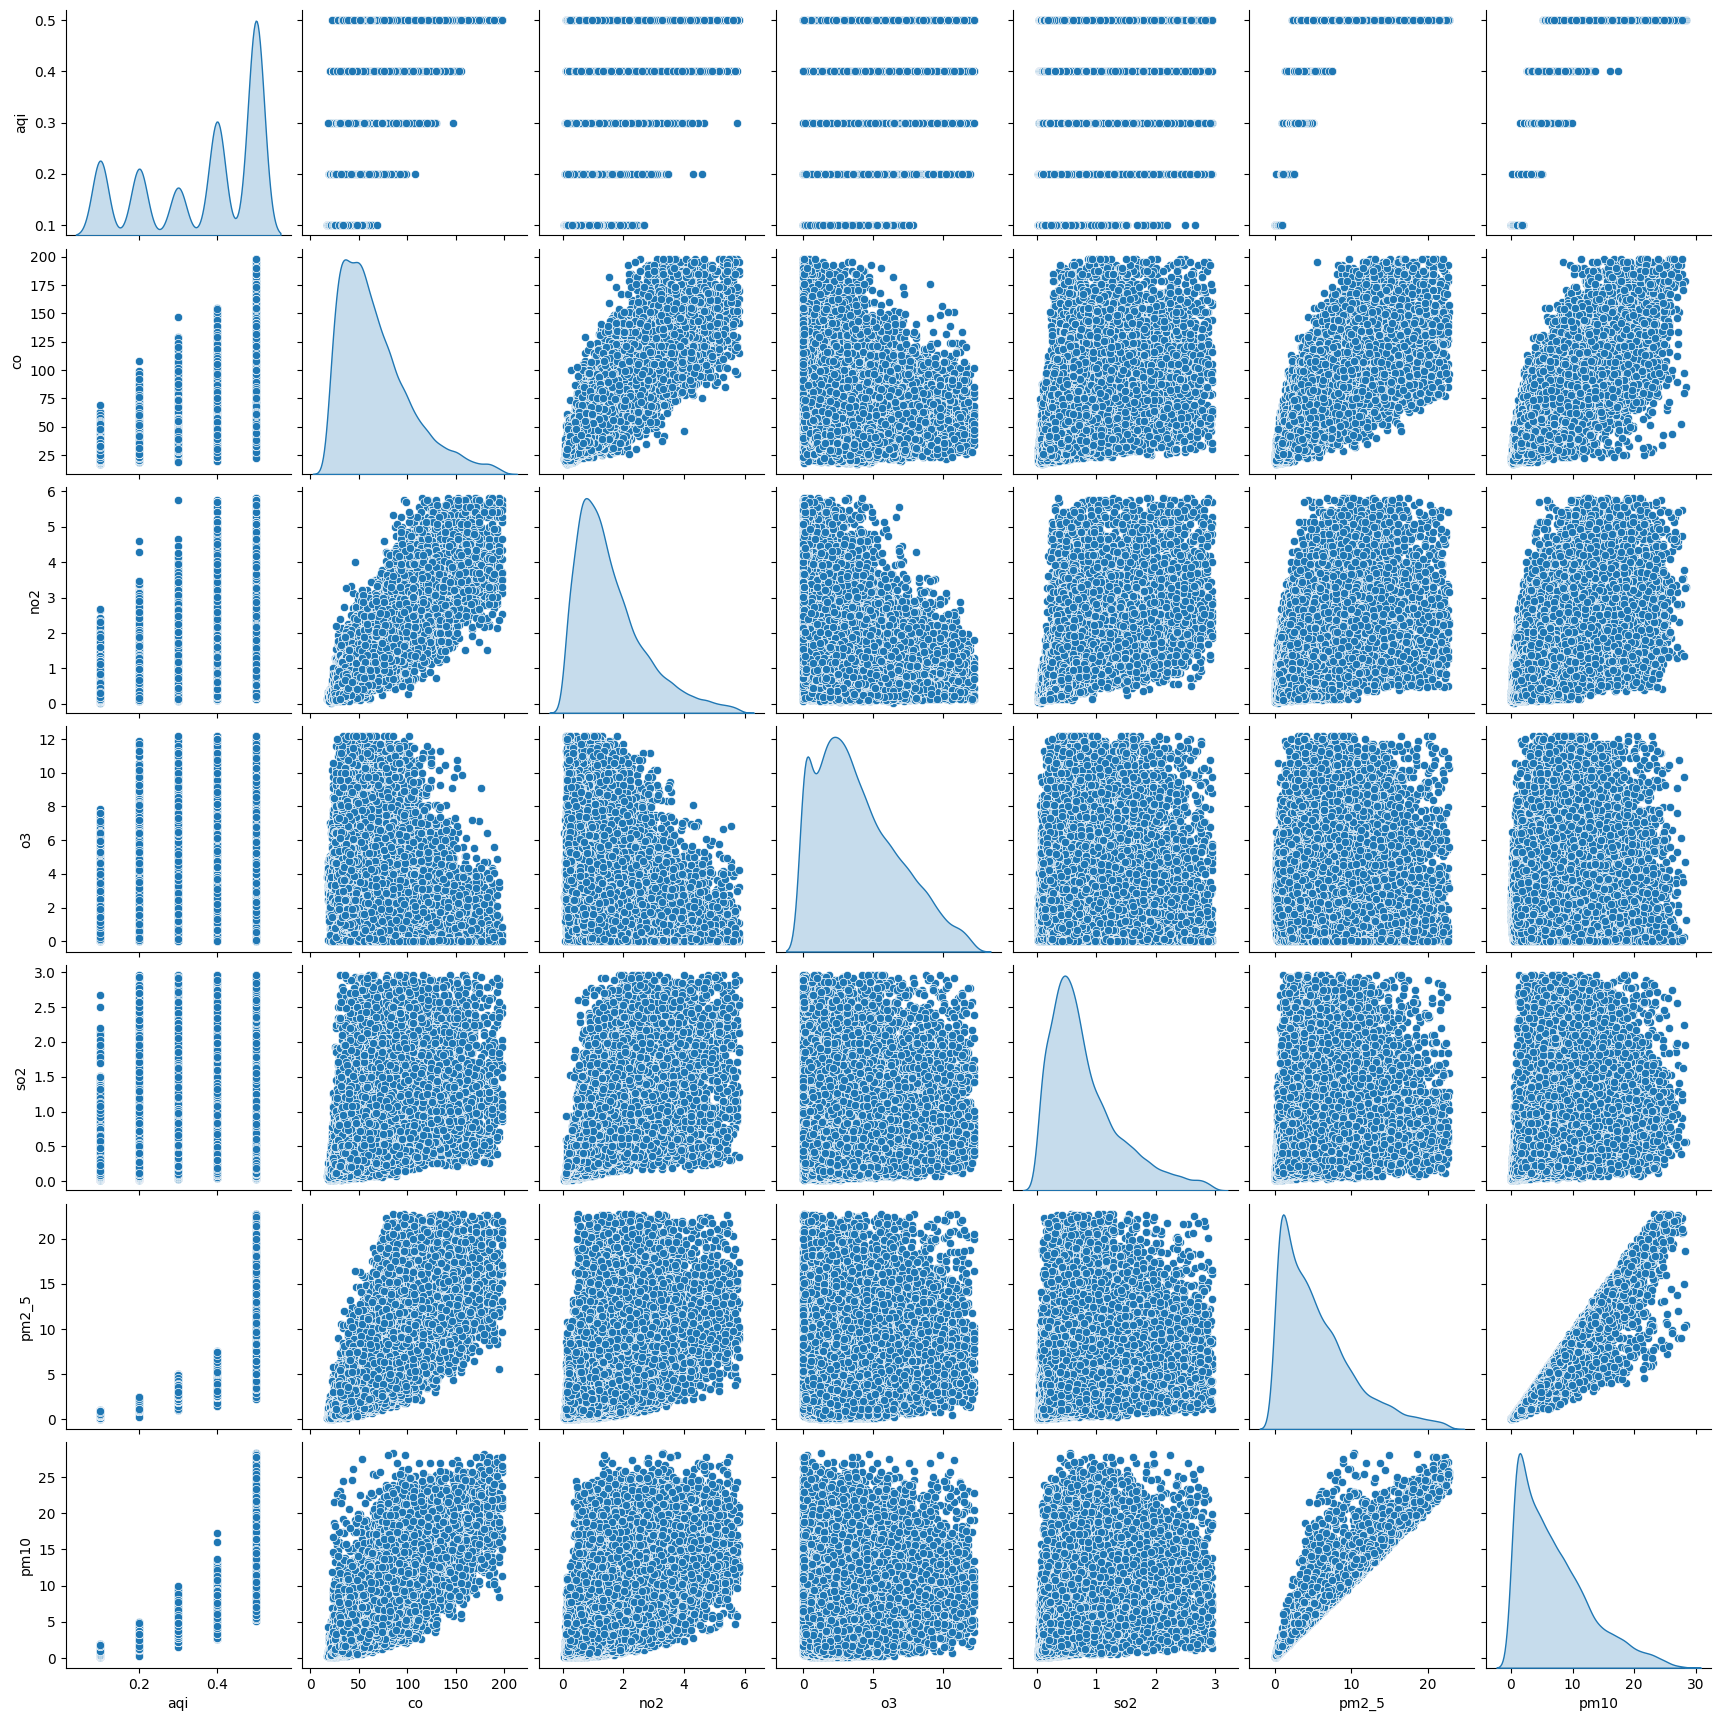

In [19]:
# Mengamati hubungan antar fitur

sns.pairplot(dfx, diag_kind = 'kde')

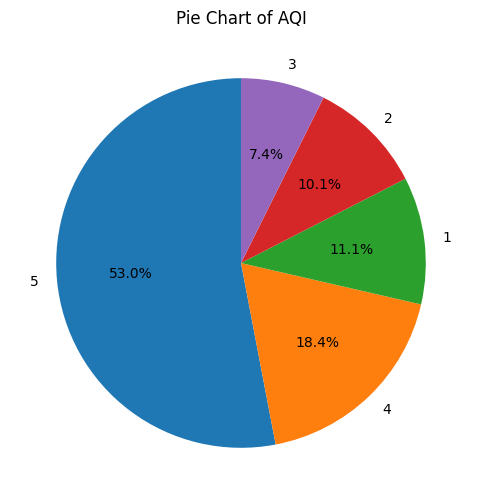

In [20]:
# pesrebaran AQI dengan pie chart

default_counts = df['aqi'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of AQI")
plt.show()

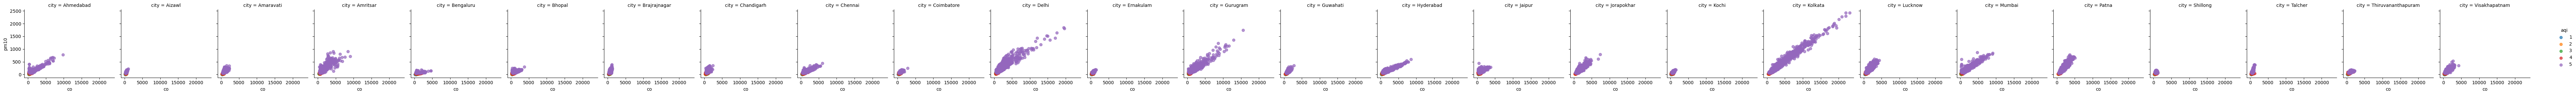

In [21]:
# cek hubungan co & pm10 disetiap kota

scatplot = sns.FacetGrid(df, col='city', hue='aqi')
scatplot.map(plt.scatter, 'co', 'pm10', alpha=.7)
scatplot.add_legend()

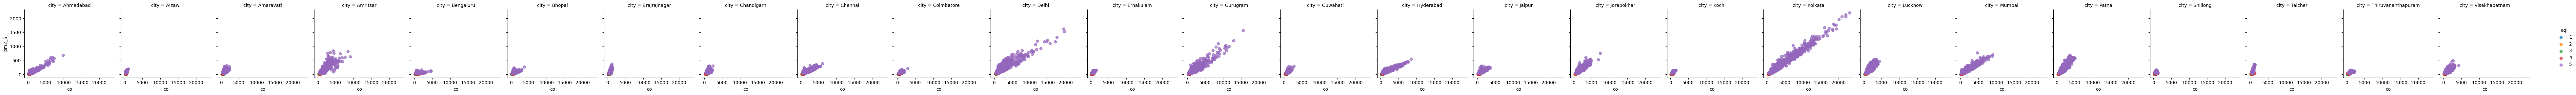

In [22]:
# cek hubungan co & pm2_5 disetiap kota

scatplot = sns.FacetGrid(df, col='city', hue='aqi')
scatplot.map(plt.scatter, 'co', 'pm2_5', alpha=.7)
scatplot.add_legend()

In [23]:
# cek hubungan co & pm10 secara keseluruhan

import plotly.express as px
fig = px.scatter(df, x="co", y="pm10", color="aqi",
                size="aqi", hover_data=['city']
)
fig.show()

In [24]:
# cek hubungan co & pm2_5 secara keseluruhan

import plotly.express as px
fig = px.scatter(df, x="co", y="pm2_5", color="aqi",
                size="aqi", hover_data=['city']
)
fig.show()

# Data Preparation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
# Input Variabel
x=df[['co','no2','o3','so2','pm2_5','pm10']]/10

# Target Variabel
y=df['aqi'].astype('category')

In [27]:
# Split: Training 90% & Testing 10%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

# Modeling: Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Object Decision tree
clf = DecisionTreeClassifier()

# Train Model
model_clf = clf.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_clf = model_clf.predict(x_test)

# Evaluasi Model : Decisiom Tree

In [30]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [31]:
# evaluasi Klasifikasi
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       280
           2       0.93      0.97      0.95       215
           3       0.57      0.60      0.58       170
           4       0.76      0.75      0.75       444
           5       0.97      0.96      0.96      1242

    accuracy                           0.90      2351
   macro avg       0.85      0.85      0.85      2351
weighted avg       0.90      0.90      0.90      2351



Text(113.9222222222222, 0.5, 'Predict Label')

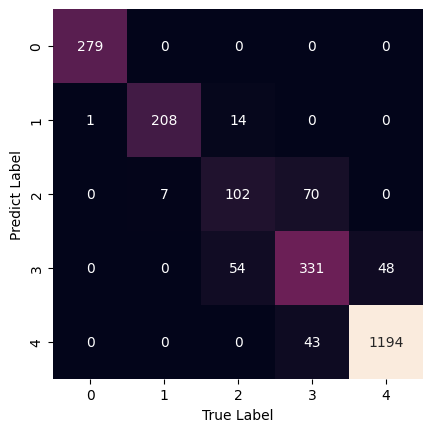

In [32]:
# Memvisualisasikan Confusion Matrix

mat=confusion_matrix(y_test,y_pred_clf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

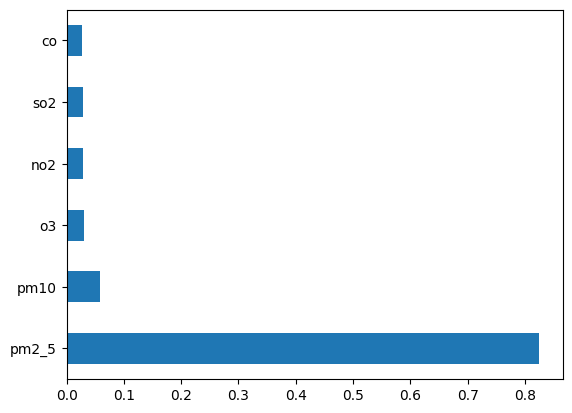

In [33]:
# Signifikan factor model

feat_importances = pd.Series(model_clf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Modeling: Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
# Object Random forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    max_leaf_nodes= 10
)

# Train Model
model_rf = rf.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_rf = model_rf.predict(x_test)

# Evaluasi Model : Random Forest

In [36]:
# evaluasi Random forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       280
           2       0.97      0.93      0.95       215
           3       0.88      0.44      0.58       170
           4       0.78      0.82      0.80       444
           5       0.94      0.99      0.97      1242

    accuracy                           0.92      2351
   macro avg       0.91      0.84      0.86      2351
weighted avg       0.91      0.92      0.91      2351



Text(113.9222222222222, 0.5, 'Predict Label')

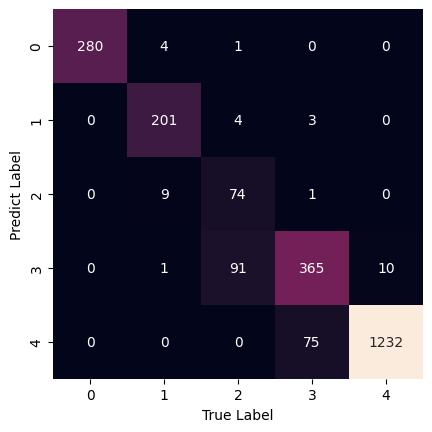

In [37]:
# Memvisualisasikan Confusion Matrix Random Forest

mat=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

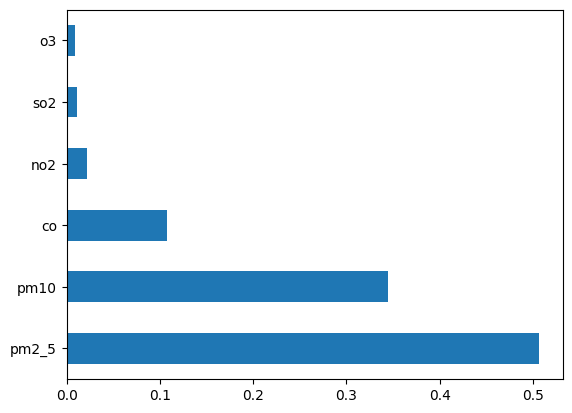

In [38]:
# Signifikan factor model

feat_importances = pd.Series(model_rf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Apply Random Forest to Delhi AQI

In [39]:
# Data Ujicoba

path2 = "/content/NewDelhi_Air_quality (1).csv"
load_data2 = pd.read_csv(path2, delimiter=',')

In [40]:
df_ex=pd.DataFrame(load_data2)
df_ex.head()

Unnamed: 0        AQI         CO       datetime       no2         o3  \
0           0  42.600002  198.60268  2022-10-26:14  0.034808  45.776367   
1           1  35.400000  199.60403  2022-10-26:15  0.034607  45.347214   
2           2  28.200000  199.93782  2022-10-26:16  0.034005  44.631958   
3           3  21.000000  200.27160  2022-10-26:17  0.033469  44.345856   
4           4  20.000000  201.94054  2022-10-26:18  0.033469  43.988228   

        pm10       pm25       so2      timestamp_local        timestamp_utc  \
0  20.490215  10.889340  0.484288  2022-10-26T19:00:00  2022-10-26T14:00:00   
1  20.559843   8.720495  0.506640  2022-10-26T20:00:00  2022-10-26T15:00:00   
2  20.810652   6.546653  0.521541  2022-10-26T21:00:00  2022-10-26T16:00:00   
3  20.712862   4.397015  0.528991  2022-10-26T22:00:00  2022-10-26T17:00:00   
4  20.244165   4.394664  0.536442  2022-10-26T23:00:00  2022-10-26T18:00:00   

           ts  
0  1666792800  
1  1666796400  
2  1666800000  
3  1666803600  
4  1666807200

In [41]:
# Rename, menyesuaikan dengan nama kolom data sebelumnya

df_ex.rename(columns={"CO": "co", "pm25": "pm2_5"}, inplace=True)

In [42]:
# drop kolom tidak perlu pada data uji coba

df_new2 = df_ex.drop(['AQI', 'datetime','timestamp_local','timestamp_utc','ts'], axis= 1)
df_ex = df_new2

In [43]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  72 non-null     int64  
 1   co          72 non-null     float64
 2   no2         72 non-null     float64
 3   o3          72 non-null     float64
 4   pm10        72 non-null     float64
 5   pm2_5       72 non-null     float64
 6   so2         72 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.1 KB


In [44]:
# Input Varibel
x1= df_ex[['co','no2','o3','so2','pm2_5','pm10']]/10




In [45]:
# melakukan prediksi

y_predict_ex = model_rf.predict(x1)
y_predict_ex

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [46]:
# Mengubah hasil pemodelan yg berbentuk array menjadi Data Frame

df_y_predict_ex = pd.DataFrame({'Prediction_AQI':y_predict_ex}).round(2)

df_y_predict_ex

Prediction_AQI
0                2
1                1
2                1
3                1
4                1
..             ...
67               1
68               1
69               1
70               1
71               1

[72 rows x 1 columns]

In [47]:
# Menggabungkan dataset Delhi AQI dan hasil predictnya

df_hasil_predict_rf=pd.concat([df_ex,df_y_predict_ex], sort=False, axis=1)
df_hasil_predict_rf.head()

Unnamed: 0         co       no2         o3       pm10      pm2_5       so2  \
0           0  198.60268  0.034808  45.776367  20.490215  10.889340  0.484288   
1           1  199.60403  0.034607  45.347214  20.559843   8.720495  0.506640   
2           2  199.93782  0.034005  44.631958  20.810652   6.546653  0.521541   
3           3  200.27160  0.033469  44.345856  20.712862   4.397015  0.528991   
4           4  201.94054  0.033469  43.988228  20.244165   4.394664  0.536442   

   Prediction_AQI  
0               2  
1               1  
2               1  
3               1  
4               1

In [48]:
# Hasil prediksi berdasarkan kategori AQI

df_hasil_predict_rf['Prediction_AQI'].value_counts()

1    71
2     1
Name: Prediction_AQI, dtype: int64

In [51]:
dfz = df_hasil_predict_rf
hasil1 = dfz[dfz['Prediction_AQI'] == 1]
hasil2 = dfz[dfz['Prediction_AQI'] == 2]

In [52]:
hasil1.describe()

Unnamed: 0          co        no2         o3       pm10      pm2_5  \
count   71.000000   71.000000  71.000000  71.000000  71.000000  71.000000   
mean    36.000000  202.819665   0.029319  45.895241  17.048527   4.371484   
std     20.639767   11.209195   0.009187   3.128794   2.127205   0.818769   
min      1.000000  188.589100   0.014057  37.908554  13.490487   3.123153   
25%     18.500000  193.595890   0.020500  43.988228  15.308553   3.945562   
50%     36.000000  196.933750   0.032465  45.418740  16.881731   4.237622   
75%     53.500000  211.954120   0.038490  48.637390  18.728815   4.517950   
max     71.000000  226.974490   0.041837  51.498413  20.810652   8.720495   

             so2  Prediction_AQI  
count  71.000000            71.0  
mean    0.527102             1.0  
std     0.063270             0.0  
min     0.413507             1.0  
25%     0.484288             1.0  
50%     0.528991             1.0  
75%     0.562519             1.0  
max     0.648200             1.0

In [53]:
hasil2.describe()

Unnamed: 0         co       no2         o3       pm10     pm2_5  \
count         1.0    1.00000  1.000000   1.000000   1.000000   1.00000   
mean          0.0  198.60268  0.034808  45.776367  20.490215  10.88934   
std           NaN        NaN       NaN        NaN        NaN       NaN   
min           0.0  198.60268  0.034808  45.776367  20.490215  10.88934   
25%           0.0  198.60268  0.034808  45.776367  20.490215  10.88934   
50%           0.0  198.60268  0.034808  45.776367  20.490215  10.88934   
75%           0.0  198.60268  0.034808  45.776367  20.490215  10.88934   
max           0.0  198.60268  0.034808  45.776367  20.490215  10.88934   

            so2  Prediction_AQI  
count  1.000000             1.0  
mean   0.484288             2.0  
std         NaN             NaN  
min    0.484288             2.0  
25%    0.484288             2.0  
50%    0.484288             2.0  
75%    0.484288             2.0  
max    0.484288             2.0